# Basic EDA for M5 Competition

The goal of this notebook is to get more insights from the data and get some patterns for later feature engineering. I have already choosed the type of my first model for this competition, here I just want to get more familiar with the data.

**Data we have**
- <code>calendar.csv</code> - Contains information about the dates on which the products are sold.
- <code>sales_train_validation.csv</code> - Contains the historical daily unit sales data per product and store [d_1 - d_1913]
- <code>sample_submission.csv</code> - The correct format for submissions. Reference the Evaluation tab for more info.
- <code>sell_prices.csv</code> - Contains information about the price of the products sold per store and date.

<code>sales_train_evaluation.csv</code> - Available one month before competition deadline. Will include sales [d_1 - d_1941]

We are given historic sales data in the sales_train_validation dataset.

- rows exist in this dataset for days d_1 (2011-01-29) to d_1913 (2016-04-24). We are given the department, category, state, and store id of the item.
- d_1914 (2016-04-25) - d_1941 (2016-05-22) represents the validation rows which we will predict in stage 1
- d_1942 (2016-05-23) - d_1969 (2016-06-19) represents the evaluation rows which we will predict for the final competition standings.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from itertools import cycle

color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [4]:
DATA_DIR = "data"
calendar = pd.read_csv(f'{DATA_DIR}/calendar.csv')
sales_train_val = pd.read_csv(f'{DATA_DIR}/sales_train_validation.csv')
sell_prices = pd.read_csv(f'{DATA_DIR}/sell_prices.csv')
sample_submission = pd.read_csv(f'{DATA_DIR}/sample_submission.csv')

In [5]:
calendar.tail(60)

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1909,2016-04-21,11612,Thursday,6,4,2016,d_1910,NaN,NaN,NaN,NaN,0,0,0
1910,2016-04-22,11612,Friday,7,4,2016,d_1911,NaN,NaN,NaN,NaN,0,0,0
1911,2016-04-23,11613,Saturday,1,4,2016,d_1912,NaN,NaN,NaN,NaN,0,0,0
1912,2016-04-24,11613,Sunday,2,4,2016,d_1913,NaN,NaN,NaN,NaN,0,0,0
1913,2016-04-25,11613,Monday,3,4,2016,d_1914,NaN,NaN,NaN,NaN,0,0,0
1914,2016-04-26,11613,Tuesday,4,4,2016,d_1915,NaN,NaN,NaN,NaN,0,0,0
1915,2016-04-27,11613,Wednesday,5,4,2016,d_1916,NaN,NaN,NaN,NaN,0,0,0
1916,2016-04-28,11613,Thursday,6,4,2016,d_1917,NaN,NaN,NaN,NaN,0,0,0
1917,2016-04-29,11613,Friday,7,4,2016,d_1918,NaN,NaN,NaN,NaN,0,0,0
1918,2016-04-30,11614,Saturday,1,4,2016,d_1919,Pesach End,Religious,NaN,NaN,0,0,0


We can see that that we don't have so much events in test periods, so may be it is not so important to learn features for every event every year, may be we can learn only on one year from dataset, so we can generate more features for this. Let's check how many unique items are in categorical event features.

In [6]:
print('number of event_name_1 unique values: {}'.format(calendar['event_name_1'].nunique()))
print('event_type_1 unique values: {}'.format(calendar['event_type_1'].unique()))
print('number of event_name_2 unique values: {}'.format(calendar['event_name_2'].nunique()))
print('event_type_2 unique values: {}'.format(calendar['event_type_2'].unique()))

number of event_name_1 unique values: 30
event_type_1 unique values: [nan 'Sporting' 'Cultural' 'National' 'Religious']
number of event_name_2 unique values: 4
event_type_2 unique values: [nan 'Cultural' 'Religious']


In [7]:
sell_prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


For sell prices may be we can generate feauture that show how much percents is higher or below the mean? When prices  are lower than usual people tend to buy more, may be we can benefit from this feauture. It is better to calculate this feature on window that is not more than a year or two, because on large windows prices are also affected by such factors as an inflation.

In [8]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


 **Visualizing the data for a single item, that sells a lot**

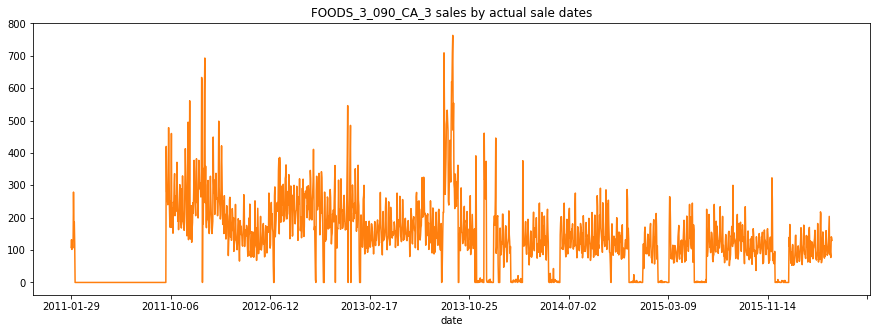

In [14]:
d_cols = [c for c in sales_train_val.columns if 'd_' in c] # sales data columns

# Merge calendar on our items' data
example = sales_train_val.loc[sales_train_val['id'] == 'FOODS_3_090_CA_3_validation'][d_cols].T
example = example.rename(columns={8412:'FOODS_3_090_CA_3'}) # Name it correctly
example = example.reset_index().rename(columns={'index': 'd'}) # make the index "d"
example = example.merge(calendar, how='left', validate='1:1')
example.set_index('date')['FOODS_3_090_CA_3'] \
    .plot(figsize=(15, 5),
          color=next(color_cycle),
          title='FOODS_3_090_CA_3 sales by actual sale dates')
plt.show()

Sometimes the values a zero, seems like that the item is not available at these moments.

**Let's take a look at different items!**

In [15]:
twenty_examples = sales_train_val.sample(20, random_state=529) \
        .set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')

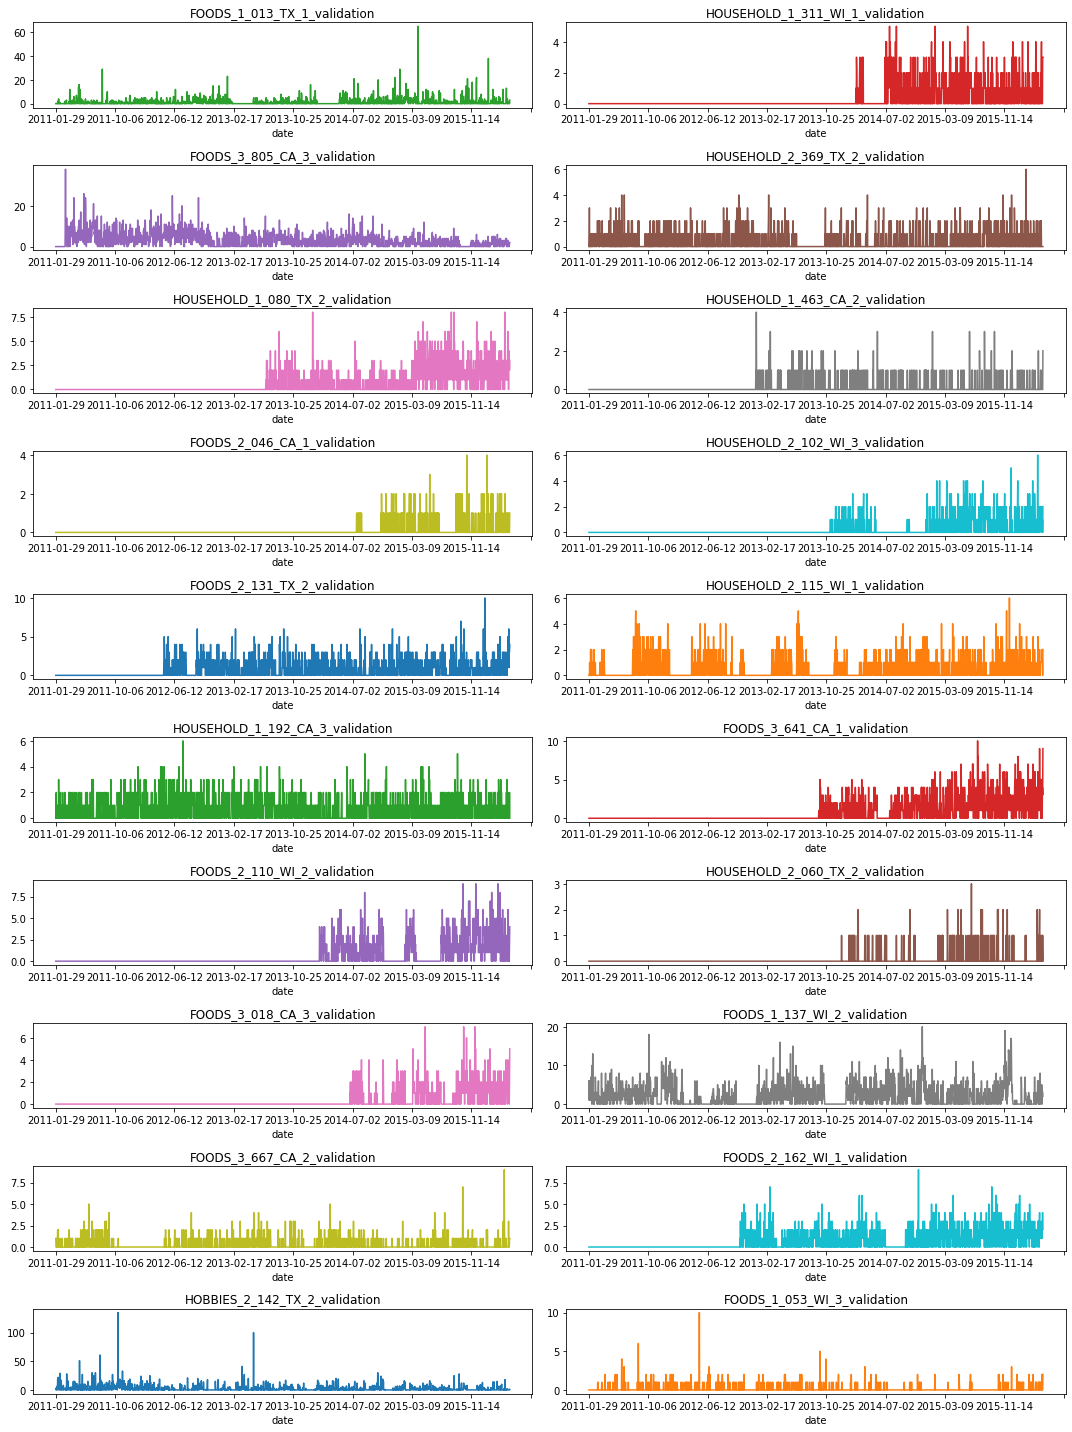

In [16]:
fig, axs = plt.subplots(10, 2, figsize=(15, 20))
axs = axs.flatten()
ax_idx = 0
for item in twenty_examples.columns:
    twenty_examples[item].plot(title=item,
                              color=next(color_cycle),
                              ax=axs[ax_idx])
    ax_idx += 1
plt.tight_layout()
plt.show()


**Combined sales over time by type**

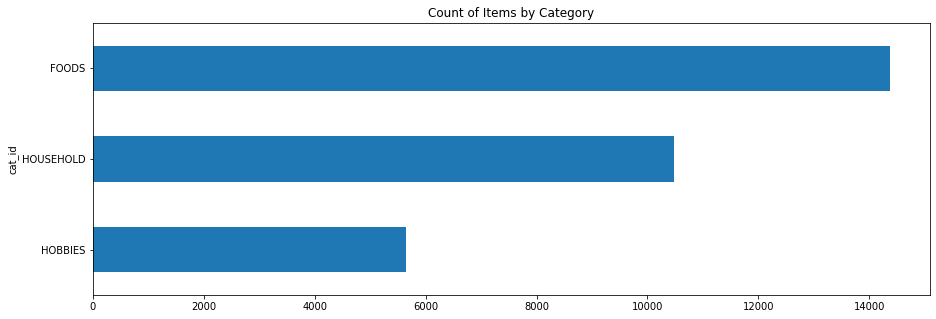

In [18]:
sales_train_val.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

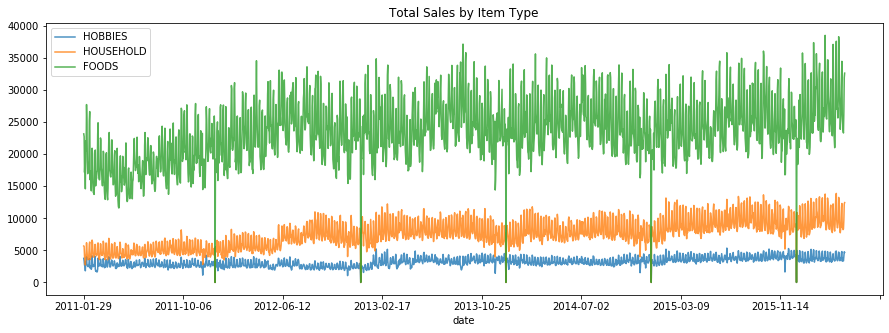

In [19]:
past_sales = sales_train_val.set_index('id')[d_cols] \
    .T \
    .merge(calendar.set_index('d')['date'],
           left_index=True,
           right_index=True,
            validate='1:1') \
    .set_index('date')


for i in sales_train_val['cat_id'].unique():
    items_col = [c for c in past_sales.columns if i in c]
    past_sales[items_col] \
        .sum(axis=1) \
        .plot(figsize=(15, 5),
              alpha=0.8,
              title='Total Sales by Item Type')
plt.legend(sales_train_val['cat_id'].unique())
plt.show()
